In [1]:
from Dental_Tool.Data_processing import *
from Dental_Tool.Dental_Model import *
from Dental_Tool.Dataloader import *

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import numpy as np
import cv2

Using TensorFlow backend.


In [2]:
directory = [ 
                "Dental_Data/PBL/10_20200901_Original", 
#                 "Dental_Data/PBL/10_20200901_Flip", 
#                 "Dental_Data/PBL/10_clahe_20200901", 
#                 "Dental_Data/PBL/10_clahe_20200901_Flip"
            ]

directory = [ i + "/mapping.json" for i in directory]
argscale_num = len(directory) * 20

data = load_json(directory, interdental=False)
dataset = json_2_dataframe_PBL(data, mode=None)
# dataset = json_2_dataframe_PBL_inderdental(data)
dataset

,Path,State,Class,source,tooth_num,angle
0,Dental_Data/PBL/10_20200901_Original/04-20-41-...,1,0,NN_191024_151623_BE78A8_6,6,5
1,Dental_Data/PBL/10_20200901_Original/04-20-41-...,1,0,NN_191024_151623_BE78A8_7,7,5
2,Dental_Data/PBL/10_20200901_Original/04-20-41-...,1,0,NN_191024_151627_BE78AD_25,25,-2
3,Dental_Data/PBL/10_20200901_Original/04-20-41-...,1,0,NN_191024_151627_BE78AD_26,26,0
4,Dental_Data/PBL/10_20200901_Original/04-20-41-...,3,2,NN_191024_151631_BE78BA_2,2,-24
...,...,...,...,...,...,...
4763,Dental_Data/PBL/10_20200901_Original/04-24-23-...,2,1,NN_180917_113920_C0A0B5_25,25,-2
4764,Dental_Data/PBL/10_20200901_Original/04-24-23-...,2,1,NN_180917_113920_C0A0B5_24,24,2
4765,Dental_Data/PBL/10_20200901_Original/04-24-23-...,2,1,NN_180917_113920_C0A0B5_23,23,3
4766,Dental_Data/PBL/10_20200901_Original/04-24-23-...,2,1,NN_180917_113933_C0A0B2_27,27,3


In [10]:
X = [ cv2.resize(cv2.imread(path, 0), (180, 200)).flatten() for path in dataset["Path"] ]
y = list( dataset["Class"] )

print("Data have been loaded")
tsne = TSNE(n_components=2, random_state=0, perplexity=100)
tsne_obj = tsne.fit_transform(X)
print("Tsne Done")
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'Class':y})
tsne_df.head()

Data have been loaded
Tsne Done


,X,Y,Class
0,-21.092031,-3.770947,0
1,-20.739618,-0.480457,0
2,-9.612545,9.705662,0
3,-2.240604,-3.945832,0
4,-8.047487,-3.184449,2


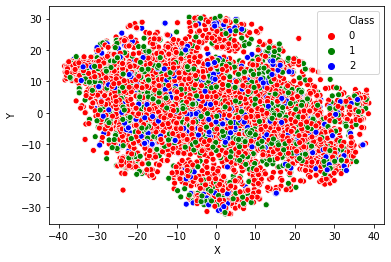

In [11]:
sns.scatterplot(x="X", y="Y",
              hue="Class",
              palette=['red','green','blue'],
              legend='full',
              data=tsne_df);

